# Tennis Statistics

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tennis_data = pd.read_csv('tennis_stats.csv')
tennis_data.head()

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272


In [3]:
print(tennis_data.columns)
print(tennis_data.describe())

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')
              Year   FirstServe  FirstServePointsWon  \
count  1721.000000  1721.000000          1721.000000   
mean   2013.646717     0.598053             0.680738   
std       2.488018     0.054533             0.070422   
min    2009.000000     0.360000             0.270000   
25%    2012.000000     0.570000             0.650000   
50%    2014.000000     0.600000             0.690000   
75%    2016.000000     0.630000             0.720000   
max    2017.000000     0.880000     

<Axes: >

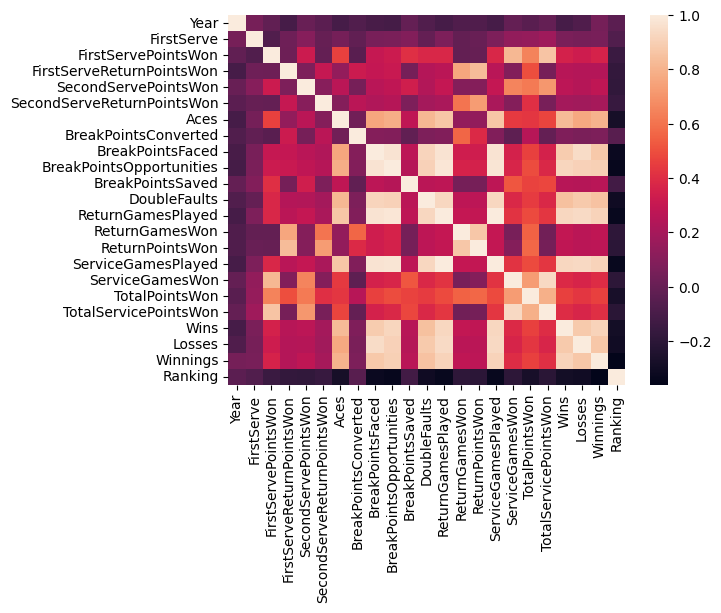

In [4]:
dropped_name = tennis_data.drop(columns='Player')
sns.heatmap(dropped_name.corr())

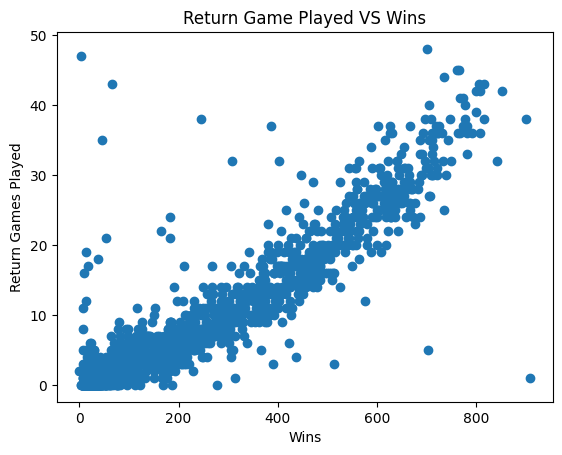

In [5]:
# ReturnGamesPlayed
# Wins
plt.clf()
plt.scatter(tennis_data['ReturnGamesPlayed'], tennis_data['Wins'])
plt.title('Return Game Played VS Wins')
plt.ylabel('Return Games Played')
plt.xlabel('Wins')
plt.show()

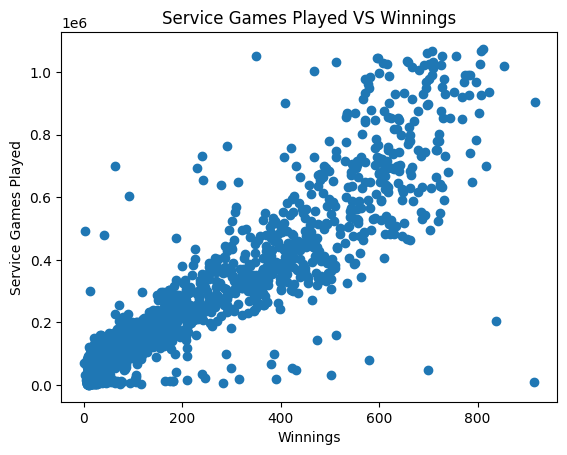

In [6]:
# ServiceGamesPlayed
# Winnings

plt.clf()
plt.scatter(tennis_data['ServiceGamesPlayed'], tennis_data['Winnings'])
plt.title('Service Games Played VS Winnings')
plt.ylabel('Service Games Played')
plt.xlabel('Winnings')
plt.show()

In [7]:
# ReturnGamesPlayed
# Wins

ReturnGamesPlayed = tennis_data[['ReturnGamesPlayed']]
Wins = tennis_data[['Wins']]

ReturnGamesPlayed_train, ReturnGamesPlayed_test, Wins_train, Wins_test = train_test_split(ReturnGamesPlayed, Wins, train_size=0.8, random_state=6)
mdl = LinearRegression()
mdl.fit(ReturnGamesPlayed_train, Wins_train)
print("Accuracy of Training Dataset " + str(mdl.score(ReturnGamesPlayed_train, Wins_train)))

Accuracy of Training Dataset 0.8662498496183195


In [8]:
Wins_predict = mdl.predict(ReturnGamesPlayed_test)
Wins_predict

array([[-1.93693064e-01],
       [ 2.22318968e+01],
       [ 1.66254994e+01],
       [ 1.42470277e+01],
       [ 1.47991729e+01],
       [ 2.72861491e+01],
       [ 2.38033870e+01],
       [ 1.27604829e+01],
       [ 2.01932068e+01],
       [ 1.16543360e+00],
       [ 1.04244840e+01],
       [ 3.37401442e+00],
       [ 1.03615893e-01],
       [-2.78638480e-01],
       [ 6.98419461e+00],
       [-2.38022316e-02],
       [ 3.75626879e+00],
       [ 2.39714213e+00],
       [ 1.86704765e-02],
       [ 1.71351718e+01],
       [ 2.35466942e+00],
       [ 2.82186921e+00],
       [ 1.27180102e+01],
       [ 1.88561309e-01],
       [ 3.58452141e-01],
       [ 3.67132337e+00],
       [ 2.31662964e+01],
       [ 1.69652810e+01],
       [ 1.28879010e+01],
       [-1.93693064e-01],
       [ 2.72436764e+01],
       [ 1.42470277e+01],
       [ 4.43397558e-01],
       [ 3.07670546e+00],
       [ 1.95561162e+01],
       [ 1.33532443e+00],
       [ 2.65197838e+00],
       [ 1.84499693e+00],
       [ 2.8

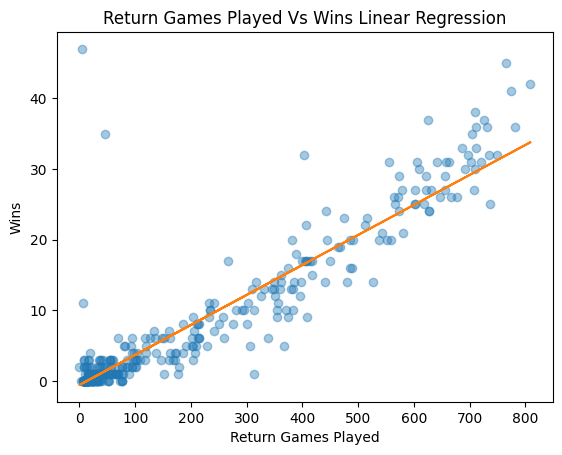

In [27]:
plt.clf()

plt.plot(ReturnGamesPlayed_test, Wins_test, 'o', alpha=0.4)
plt.plot(ReturnGamesPlayed_test, Wins_predict)

plt.xlabel('Return Games Played')
plt.ylabel('Wins')
plt.title('Return Games Played Vs Wins Linear Regression')


plt.show()

In [10]:
# Check Outlier
outlier_data = tennis_data[(tennis_data['ReturnGamesPlayed'] < 10) & (tennis_data['Wins'] >40)]
outlier_data

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
1693,Mate Pavic,2017,0.47,0.63,0.22,0.22,0.1,1,0.0,3,...,0.0,0.16,3,0.33,0.28,0.41,47,27,491066,938


In [11]:
# BreakPointsOpportunities, FirstServeReturnPointsWon
# Winnings

BreakPointsOpportunities_FirstServeReturnPointsWon = tennis_data[['BreakPointsOpportunities', 'FirstServeReturnPointsWon']]
Winnings = tennis_data['Winnings']

BreakPointsOpportunities_FirstServeReturnPointsWon_train, BreakPointsOpportunities_FirstServeReturnPointsWon_test, Winnings_train, Winnings_test = train_test_split(BreakPointsOpportunities_FirstServeReturnPointsWon, Winnings, train_size=0.8)

In [12]:
model = LinearRegression()
model.fit(BreakPointsOpportunities_FirstServeReturnPointsWon_train, Winnings_train)
print("Predicting :" + str(model.score(BreakPointsOpportunities_FirstServeReturnPointsWon_train, Winnings_train)))


Predicting :0.8191450638750096


In [22]:
Winnings_Predict = model.predict(BreakPointsOpportunities_FirstServeReturnPointsWon_test)

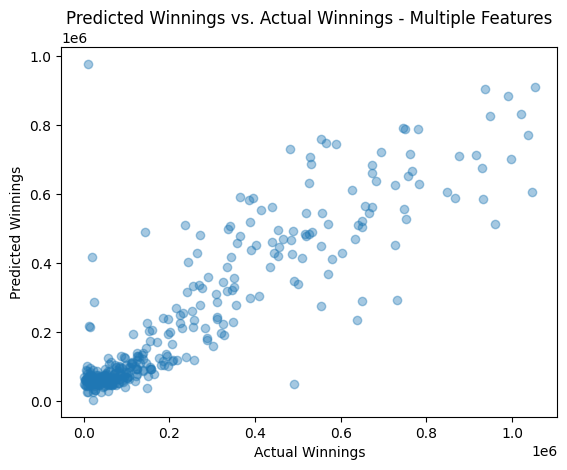

<Figure size 640x480 with 0 Axes>

In [23]:
plt.scatter(Winnings_test,Winnings_Predict, alpha=0.4)
plt.title('Predicted Winnings vs. Actual Winnings - Multiple Features')
plt.xlabel('Actual Winnings')
plt.ylabel('Predicted Winnings')
plt.show()
plt.clf()